In [20]:
import geopandas as gp
import pandas as pd
import fiona
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
plt.rcParams['figure.figsize'] = (9,12)
plt.rcParams['pgf.rcfonts'] = False
plt.rcParams['figure.edgecolor'] = 'k'
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['savefig.dpi'] = 400
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "serif"
import matplotlib.colors as colors
# plt.style.use('ggplot')
import numpy as np

In [21]:
county_bd = gp.read_file('../data_misc/IL_Shapefiles/IL_BNDY_County_Ln.shp')

<AxesSubplot:>

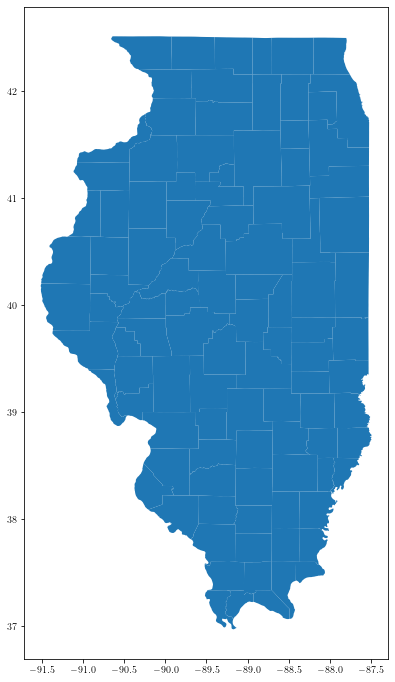

In [22]:
counties = gp.read_file('../data_misc/IL_Shapefiles/IL_BNDY_County_Py.shp')
counties.to_crs(epsg=4326, inplace=True)

fig, ax = plt.subplots(figsize=(9,12))
counties.plot(ax=ax, color='tab:blue')

In [23]:
counties

,COUNTY_NAM,CO_FIPS,geometry
0,MCHENRY,111,"POLYGON ((-88.70742 42.49351, -88.68809 42.493..."
1,BOONE,7,"POLYGON ((-88.70742 42.49351, -88.70740 42.493..."
2,OGLE,141,"POLYGON ((-89.68808 42.19949, -89.66846 42.200..."
3,WILL,197,"POLYGON ((-88.26146 41.72439, -88.26146 41.724..."
4,LASALLE,99,"POLYGON ((-88.93885 41.62836, -88.93871 41.628..."
...,...,...,...
97,JEFFERSON,81,"POLYGON ((-89.14445 38.47386, -89.12638 38.473..."
98,LAWRENCE,101,"POLYGON ((-87.90805 38.85012, -87.88944 38.849..."
99,MARION,121,"POLYGON ((-89.13843 38.73632, -89.13827 38.750..."
100,UNION,181,"POLYGON ((-89.04143 37.59649, -89.04143 37.596..."


In [24]:
counties['centroid'] = counties.geometry.centroid
counties

<ipython-input-24-e8764482c936>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  counties['centroid'] = counties.geometry.centroid


,COUNTY_NAM,CO_FIPS,geometry,centroid
0,MCHENRY,111,"POLYGON ((-88.70742 42.49351, -88.68809 42.493...",POINT (-88.45249 42.32433)
1,BOONE,7,"POLYGON ((-88.70742 42.49351, -88.70740 42.493...",POINT (-88.82337 42.32306)
2,OGLE,141,"POLYGON ((-89.68808 42.19949, -89.66846 42.200...",POINT (-89.32065 42.04275)
3,WILL,197,"POLYGON ((-88.26146 41.72439, -88.26146 41.724...",POINT (-87.97864 41.44501)
4,LASALLE,99,"POLYGON ((-88.93885 41.62836, -88.93871 41.628...",POINT (-88.88591 41.34402)
...,...,...,...,...
97,JEFFERSON,81,"POLYGON ((-89.14445 38.47386, -89.12638 38.473...",POINT (-88.92400 38.30053)
98,LAWRENCE,101,"POLYGON ((-87.90805 38.85012, -87.88944 38.849...",POINT (-87.72676 38.71991)
99,MARION,121,"POLYGON ((-89.13843 38.73632, -89.13827 38.750...",POINT (-88.91893 38.64955)
100,UNION,181,"POLYGON ((-89.04143 37.59649, -89.04143 37.596...",POINT (-89.25510 37.47124)


<ipython-input-25-e10661733e3d>:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  counties.centroid.plot(ax=ax, color='tab:red')


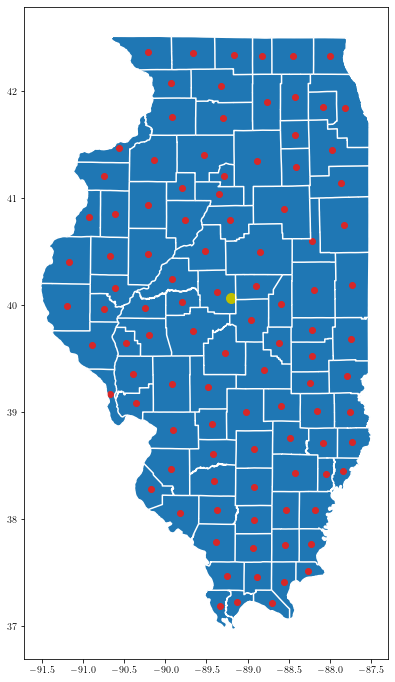

In [25]:
fig, ax = plt.subplots(figsize=(9,12))
counties.geometry.plot(ax=ax, color='tab:blue')
counties.centroid.plot(ax=ax, color='tab:red')
county_bd.plot(ax=ax, color='w')
ax.scatter(x=-89.19834, y=40.06501, color='y', s=100)

In [26]:
cty = counties.copy()
cty

,COUNTY_NAM,CO_FIPS,geometry,centroid
0,MCHENRY,111,"POLYGON ((-88.70742 42.49351, -88.68809 42.493...",POINT (-88.45249 42.32433)
1,BOONE,7,"POLYGON ((-88.70742 42.49351, -88.70740 42.493...",POINT (-88.82337 42.32306)
2,OGLE,141,"POLYGON ((-89.68808 42.19949, -89.66846 42.200...",POINT (-89.32065 42.04275)
3,WILL,197,"POLYGON ((-88.26146 41.72439, -88.26146 41.724...",POINT (-87.97864 41.44501)
4,LASALLE,99,"POLYGON ((-88.93885 41.62836, -88.93871 41.628...",POINT (-88.88591 41.34402)
...,...,...,...,...
97,JEFFERSON,81,"POLYGON ((-89.14445 38.47386, -89.12638 38.473...",POINT (-88.92400 38.30053)
98,LAWRENCE,101,"POLYGON ((-87.90805 38.85012, -87.88944 38.849...",POINT (-87.72676 38.71991)
99,MARION,121,"POLYGON ((-89.13843 38.73632, -89.13827 38.750...",POINT (-88.91893 38.64955)
100,UNION,181,"POLYGON ((-89.04143 37.59649, -89.04143 37.596...",POINT (-89.25510 37.47124)


In [27]:
cty.dissolve().centroid

<ipython-input-27-60839e2e0788>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cty.dissolve().centroid


0    POINT (-89.19834 40.06501)
dtype: geometry

In [28]:
county_bd

,STATELINE,geometry
0,1,"LINESTRING (-90.42045 42.32985, -90.41968 42.3..."
1,1,"LINESTRING (-90.25336 42.17161, -90.25340 42.1..."
2,0,"LINESTRING (-88.70559 42.15354, -88.70559 42.1..."
3,1,"LINESTRING (-88.19956 42.49509, -88.17973 42.4..."
4,0,"LINESTRING (-88.19984 42.15425, -88.18069 42.1..."
...,...,...
342,1,"LINESTRING (-88.41540 37.42395, -88.41576 37.4..."
343,1,"LINESTRING (-88.92789 37.22650, -88.92920 37.2..."
344,0,"LINESTRING (-89.26467 37.17338, -89.26495 37.1..."
345,1,"LINESTRING (-88.49010 37.06853, -88.49157 37.0..."


In [29]:
counties['lon'] = counties.centroid.x
counties['lat'] = counties.centroid.y
counties

<ipython-input-29-02d2e97dc4df>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  counties['lon'] = counties.centroid.x
<ipython-input-29-02d2e97dc4df>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  counties['lat'] = counties.centroid.y


,COUNTY_NAM,CO_FIPS,geometry,centroid,lon,lat
0,MCHENRY,111,"POLYGON ((-88.70742 42.49351, -88.68809 42.493...",POINT (-88.45249 42.32433),-88.452491,42.324334
1,BOONE,7,"POLYGON ((-88.70742 42.49351, -88.70740 42.493...",POINT (-88.82337 42.32306),-88.823365,42.323058
2,OGLE,141,"POLYGON ((-89.68808 42.19949, -89.66846 42.200...",POINT (-89.32065 42.04275),-89.320652,42.042750
3,WILL,197,"POLYGON ((-88.26146 41.72439, -88.26146 41.724...",POINT (-87.97864 41.44501),-87.978636,41.445013
4,LASALLE,99,"POLYGON ((-88.93885 41.62836, -88.93871 41.628...",POINT (-88.88591 41.34402),-88.885911,41.344020
...,...,...,...,...,...,...
97,JEFFERSON,81,"POLYGON ((-89.14445 38.47386, -89.12638 38.473...",POINT (-88.92400 38.30053),-88.924003,38.300533
98,LAWRENCE,101,"POLYGON ((-87.90805 38.85012, -87.88944 38.849...",POINT (-87.72676 38.71991),-87.726761,38.719906
99,MARION,121,"POLYGON ((-89.13843 38.73632, -89.13827 38.750...",POINT (-88.91893 38.64955),-88.918930,38.649555
100,UNION,181,"POLYGON ((-89.04143 37.59649, -89.04143 37.596...",POINT (-89.25510 37.47124),-89.255097,37.471236


In [30]:
counties.sort_values(by='COUNTY_NAM', inplace=True)

counties[['COUNTY_NAM', 'lon','lat']].to_csv('il_county_coords.csv')

In [31]:
ghi_df = pd.read_csv('average_ghi_il.csv')
ghi_df.sort_values(by='county', inplace=True)

In [32]:
ghi_df

,Unnamed: 0,county,avg_ghi
13,13,ADAMS,167.923059
61,61,ALEXANDER,175.216781
91,91,BOND,169.119977
1,1,BOONE,157.595034
39,39,BROWN,168.846518
...,...,...,...
63,63,WHITESIDE,161.754281
3,3,WILL,157.686358
70,70,WILLIAMSON,171.975342
67,67,WINNEBAGO,158.400913


In [33]:
wind_df = pd.read_csv('average_
                      wind_il_80m.csv', usecols=['county', 'avg_wind'])
wind_df.sort_values(by='county', inplace=True)

In [35]:
wind_df

,county,avg_wind
13,ADAMS,7.101785
61,ALEXANDER,6.274413
91,BOND,6.480251
1,BOONE,6.650842
39,BROWN,6.992013
...,...,...
63,WHITESIDE,6.511824
3,WILL,6.861722
70,WILLIAMSON,6.301771
67,WINNEBAGO,6.714002


In [34]:
counties['avg_ghi'] = ghi_df.avg_ghi
counties['ghi_converted'] = counties.avg_ghi*8760/(365*1000)
counties['avg_wind'] = wind_df.avg_wind
counties

,COUNTY_NAM,CO_FIPS,geometry,centroid,lon,lat,avg_ghi,ghi_converted,avg_wind
13,ADAMS,1,"POLYGON ((-91.50534 40.20028, -91.49184 40.200...",POINT (-91.18843 39.98784),-91.188430,39.987842,167.923059,4.030153,7.101785
61,ALEXANDER,3,"POLYGON ((-89.48603 37.33453, -89.47082 37.334...",POINT (-89.33759 37.19138),-89.337594,37.191382,175.216781,4.205203,6.274413
91,BOND,5,"POLYGON ((-89.25026 39.02822, -89.25025 39.013...",POINT (-89.43553 38.88684),-89.435525,38.886838,169.119977,4.058879,6.480251
1,BOONE,7,"POLYGON ((-88.70742 42.49351, -88.70740 42.493...",POINT (-88.82337 42.32306),-88.823365,42.323058,157.595034,3.782281,6.650842
39,BROWN,9,"POLYGON ((-90.62494 40.02607, -90.62491 40.026...",POINT (-90.75037 39.96182),-90.750366,39.961822,168.846518,4.052316,6.992013
...,...,...,...,...,...,...,...,...,...
63,WHITESIDE,195,"POLYGON ((-90.15197 41.92903, -90.13285 41.929...",POINT (-89.91390 41.75643),-89.913903,41.756434,161.754281,3.882103,6.511824
3,WILL,197,"POLYGON ((-88.26146 41.72439, -88.26146 41.724...",POINT (-87.97864 41.44501),-87.978636,41.445013,157.686358,3.784473,6.861722
70,WILLIAMSON,199,"POLYGON ((-89.15102 37.86180, -89.15021 37.861...",POINT (-88.92996 37.73018),-88.929957,37.730181,171.975342,4.127408,6.301771
67,WINNEBAGO,201,"POLYGON ((-88.94032 42.49504, -88.94034 42.492...",POINT (-89.16078 42.33634),-89.160780,42.336342,158.400913,3.801622,6.714002


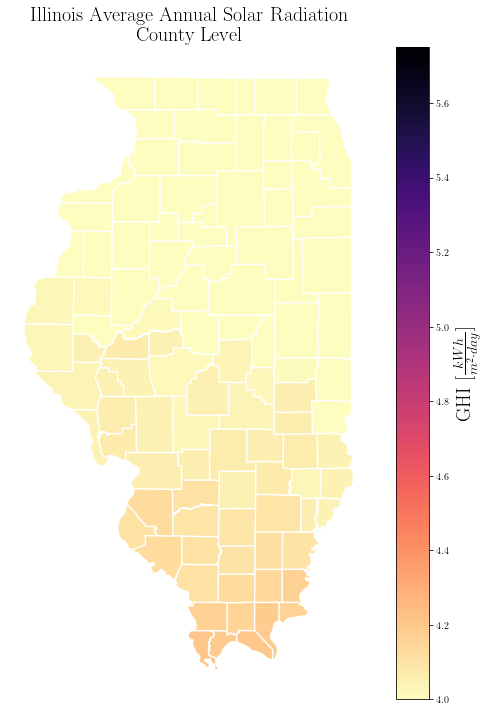

In [37]:
fig, ax = plt.subplots(figsize=(9,12))
norm = colors.Normalize(vmin=4.00, vmax=5.75)
cmap = 'magma_r'
cbar = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
counties.plot(ax=ax, column='ghi_converted', norm=norm, cmap=cmap, legend=False)
ax_cbar = fig.colorbar(cbar, ax=ax)
ax_cbar.set_label(r'GHI [$\frac{kWh}{m^2\cdot day}$]', fontsize=20)
# counties.centroid.plot(ax=ax, color='tab:red')
county_bd.plot(ax=ax, color='w')
ax.set_title('Illinois Average Annual Solar Radiation\n County Level', fontsize=20)
ax.set_axis_off()

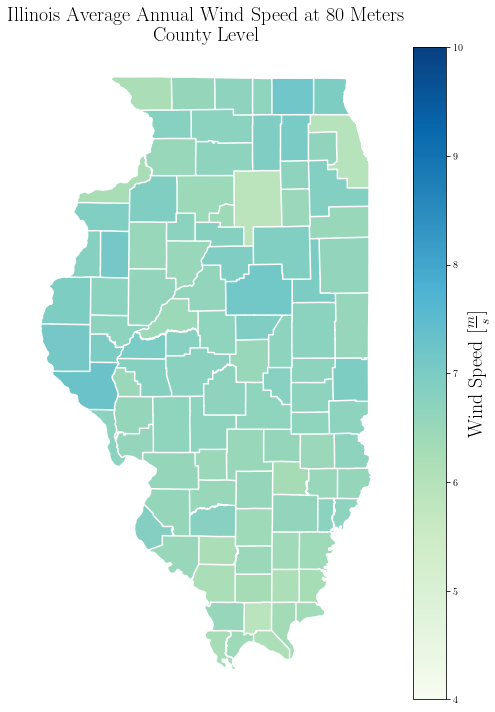

In [36]:
fig, axes = plt.subplots(figsize=(9,12))

norm2 = colors.Normalize(vmin=4.00, vmax=10)
cmap2 = 'GnBu'
cbar2 = plt.cm.ScalarMappable(norm=norm2, cmap=cmap2)
counties.plot(ax=axes, column='avg_wind', norm=norm2, cmap=cmap2, legend=False)
ax_cbar2 = fig.colorbar(cbar2, ax=axes)
ax_cbar2.set_label(r'Wind Speed [$\frac{m}{s}$]', fontsize=20)
# counties.centroid.plot(ax=ax, color='tab:red')
county_bd.plot(ax=axes, color='w')
axes.set_title('Illinois Average Annual Wind Speed at 80 Meters\n County Level', fontsize=20)
# fig.suptitle('yes')
# plt.tight_layout()
axes.set_axis_off()

In [19]:
counties.to_csv('il_renewable_potential.csv')